### パッケージのインポート

In [1]:
import numpy as np
import scipy.stats as ss
import matplotlib.pyplot as plt

### 標本データの読み込み
loadtxtでファイル"task11_1.csv"読み込み

In [4]:
sample = np.loadtxt("data/task11_1.csv",delimiter=',')
print("データの先頭5行")
print(sample[:5,:1],sample[:5,1:])

データの先頭5行
[[-1.2  ]
 [ 5.534]
 [ 2.725]
 [-3.297]
 [-0.966]] [[-0.576]
 [ 2.819]
 [ 0.187]
 [ 1.57 ]
 [ 3.279]]


### ヒストグラムを図示

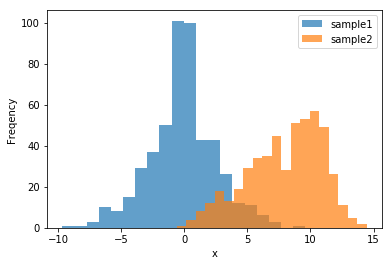

In [5]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(sample[:,:1],bins=20,alpha=0.7, label="sample1")
ax.hist(sample[:,1:],bins=20,alpha=0.7, label="sample2")
plt.xlabel("x")
plt.ylabel("Freqency")
plt.legend()
plt.show()

### 確率密度を図示

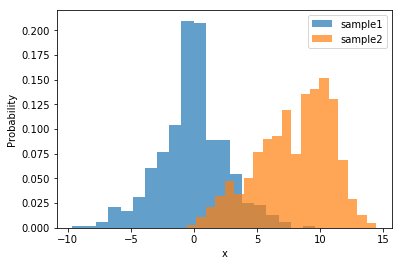

In [6]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(sample[:,:1],bins=20,alpha=0.7, label="sample1", density=True)
ax.hist(sample[:,1:],bins=20,alpha=0.7, label="sample2", density=True)
plt.xlabel("x")
plt.ylabel("Probability")
plt.legend()
plt.show()

###  累積分布関数を図示 

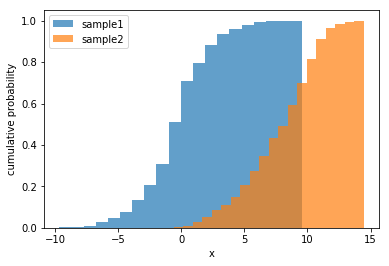

In [7]:
fig=plt.figure()
ax=fig.add_subplot(1,1,1)
ax.hist(sample[:,:1],bins=20,alpha=0.7, label="sample1", density=True, cumulative=True)
ax.hist(sample[:,1:],bins=20,alpha=0.7, label="sample2", density=True, cumulative=True)
plt.xlabel("x")
plt.ylabel("cumulative probability")
plt.legend()
plt.show()

### 標本データの平均，分散，標準偏差を求める

In [8]:
print("平均(Mean):{:.3f} {:.3f}".format(np.mean(sample[:,0]), np.mean(sample[:,1])))
print("分散(Variance):{:.3f} {:.3f}".format(np.var(sample[:,0]), np.var(sample[:,1])))
print("標準偏差(Standard deviation):{:.3f} {:.3f}".format(np.std(sample[:,0]), np.std(sample[:,1])))

平均(Mean):-0.105 7.957
分散(Variance):7.043 8.676
標準偏差(Standard deviation):2.654 2.946


### 歪度，尖度，高次モーメントを求める

In [9]:
print("歪度(Skewness):",ss.skew(sample[:,0]), ss.skew(sample[:,1]))
print("尖度(Kurtosis):",ss.kurtosis(sample[:,0]), ss.skew(sample[:,1]))
print("5次モーメント(The 5th moment):",ss.moment(sample[:,0], moment=5), ss.moment(sample[:,1], moment=5))

歪度(Skewness): -0.05060682625217152 -0.48967339327615933
尖度(Kurtosis): 0.8841493595016399 -0.48967339327615933
5次モーメント(The 5th moment): -59.284222946686164 -638.9306858360663


### 標準化変数を求める

In [11]:
z=ss.zscore(sample)
print("Z得点（先頭5行）\n", z[:5])

Z得点（先頭5行）
 [[-0.41269908 -2.89707153]
 [ 2.12476376 -1.74447124]
 [ 1.06629434 -2.63803353]
 [-1.20287721 -2.16850593]
 [-0.32452469 -1.58830154]]


### 標準化後のヒストグラムを図示

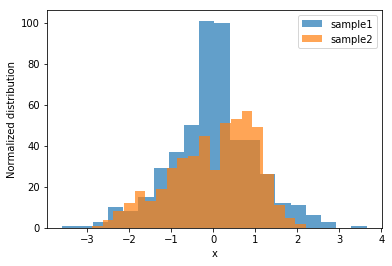

In [12]:
plt.hist(z[:,:1],bins=20,alpha=0.7, label="sample1")
plt.hist(z[:,1:],bins=20,alpha=0.7, label="sample2")
plt.xlabel("x")
plt.ylabel("Normalized distribution")
plt.legend()
plt.show()

### 標準化後の統計量を求める

In [13]:
print("平均(mean):",np.mean(z[:,:1]),np.mean(z[:,1:]))
print("分散(variance):",np.var(z[:,:1]),np.var(z[:,1:]))
print("標準偏差(standard deviation):",np.std(z[:,:1]),np.std(z[:,1:]))
print("歪度(skewness):",ss.skew(z[:,:1]),ss.skew(z[:,1:]))
print("尖度(kurtosis):",ss.kurtosis(z[:,:1]),ss.kurtosis(z[:,1:]))
print("5次モーメント(5th moment):",ss.moment(z[:,:1], moment=5),ss.moment(z[:,1:], moment=5))

平均(mean): 1.9539925233402754e-17 7.958078640513122e-16
分散(variance): 1.0000000000000007 0.9999999999999992
標準偏差(standard deviation): 1.0000000000000002 0.9999999999999996
歪度(skewness): [-0.05060683] [-0.48967339]
尖度(kurtosis): [0.88414936] [-0.4841709]
5次モーメント(5th moment): [-0.45037266] [-2.88169811]


### 標準化モーメントの関数を定義
引数は標本データと次元とする  
モーメント関数ss.moment()と標準偏差を求める関数np.stdを用いる

In [14]:
def normalMoment(data,n):
    return ss.moment(data,n) / np.std(data)

### ５次の標準化モーメントを求める

In [15]:
print("5次の標準化モーメント:",normalMoment(z[:,:1],5),normalMoment(z[:,1:],5))

5次の標準化モーメント: [-0.45037266] [-2.88169811]
